<h1>Tarea 4</h1>
<h6>Grupo:46</h6>
Importar datos y librerias 

In [7]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

In [27]:
dataset.shape

(200, 5)

<h4>Tratamiento de datos</h4>
Se transformaron los datos Gender para poder realizar las graficas 

In [49]:
data=dataset.drop(['Gender'], axis=1)

<h4>Analisis exploratorio</h4>
Se realiza un analisis de todos los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.

In [50]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [51]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [53]:
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


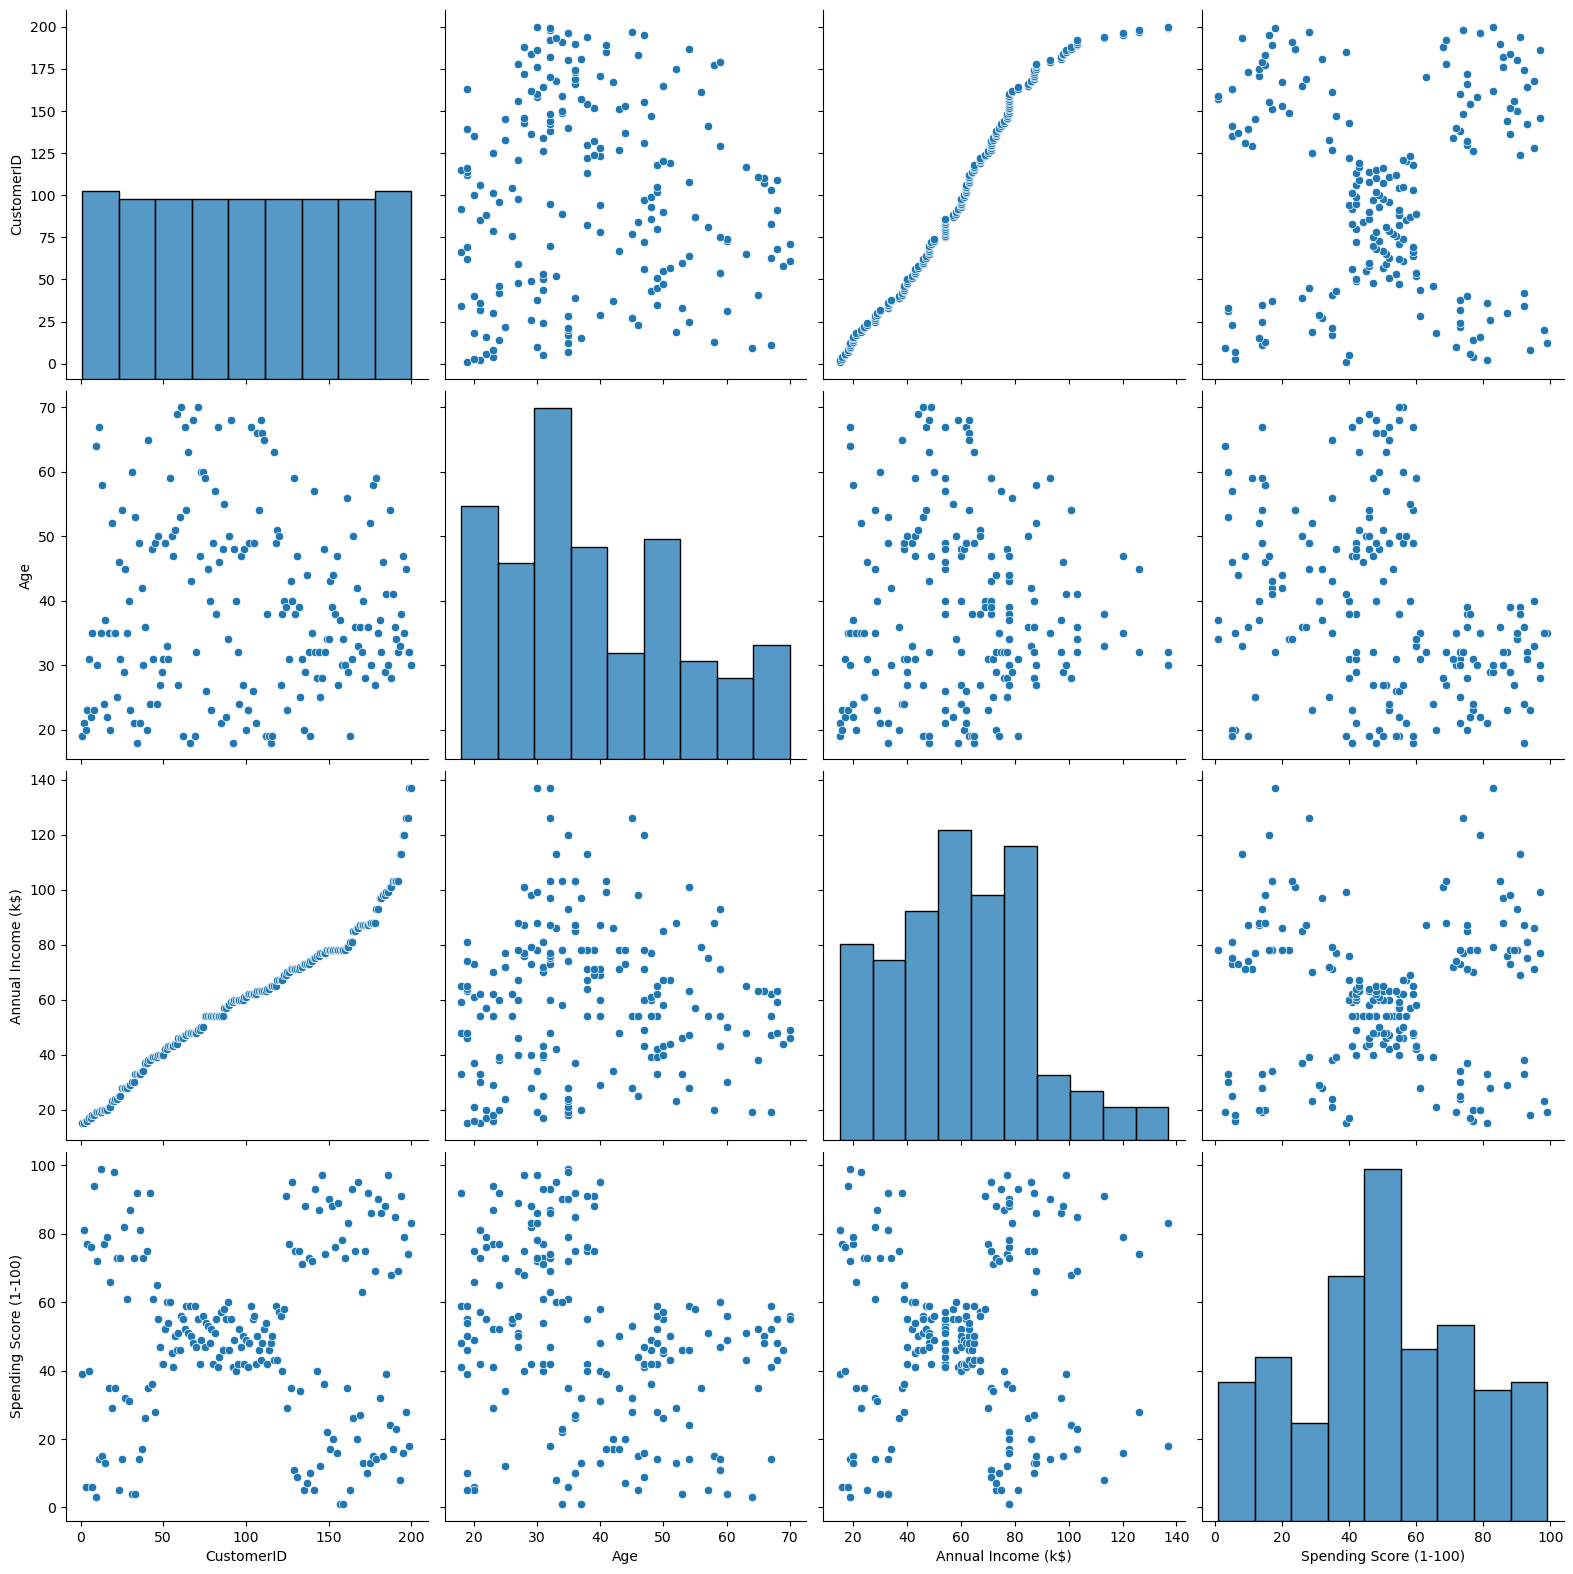

In [54]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [55]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

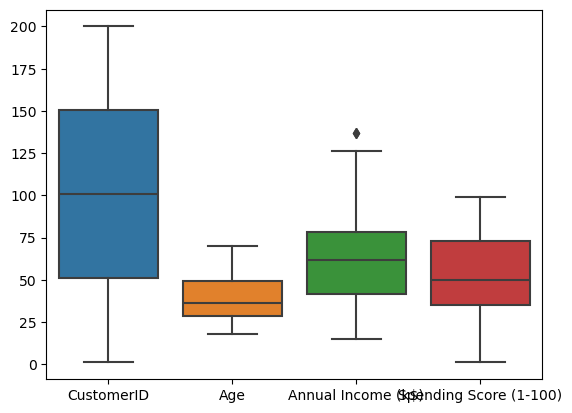

In [56]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [57]:

# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


<h1>K.MEANS</h1>

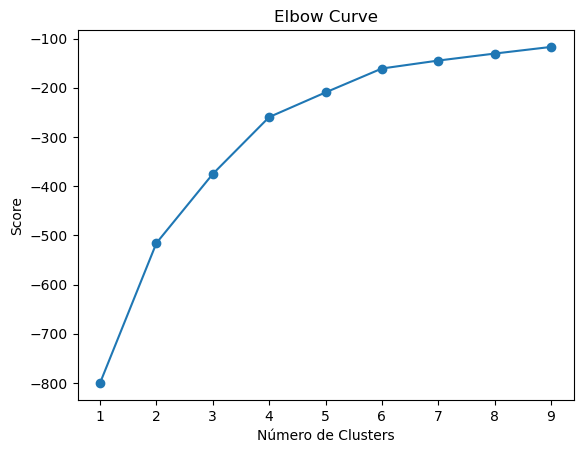

In [58]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.92939362, -0.88065283, -0.8898968 ,  0.30757573],
       [-0.47436436,  1.15787451, -0.42523207, -0.38283068],
       [ 1.01711144, -0.26655566,  0.95170995,  0.07658871]])

<h4>Grafica 1</h4>
Ingresos anuales Vs Edad

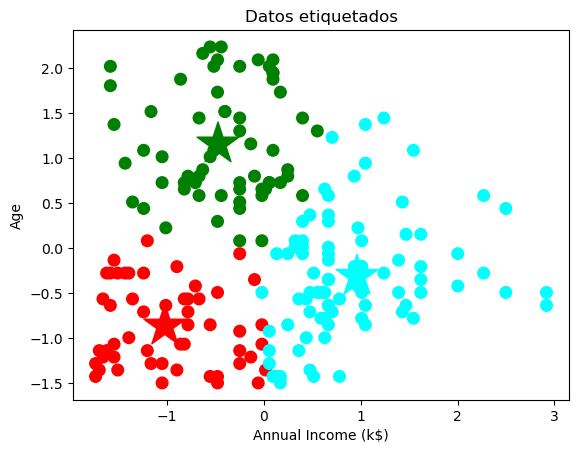

In [70]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 
f1 = X['Annual Income (k$)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

<h4>Grafica 2</h4>
Puntuación de gastos (1-100) Vs Edad

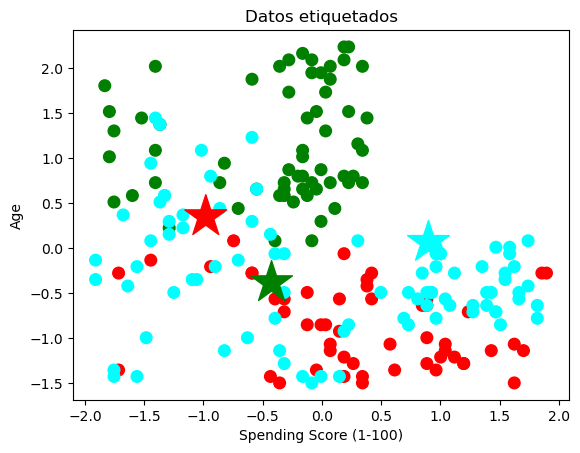

In [71]:
f1 = X['Spending Score (1-100)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

In [ ]:
Puntuación de gastos (1-100)

<h4>Grafica 4</h4>
Puntuación de gastos (1-100) Vs Ingresos anuales 

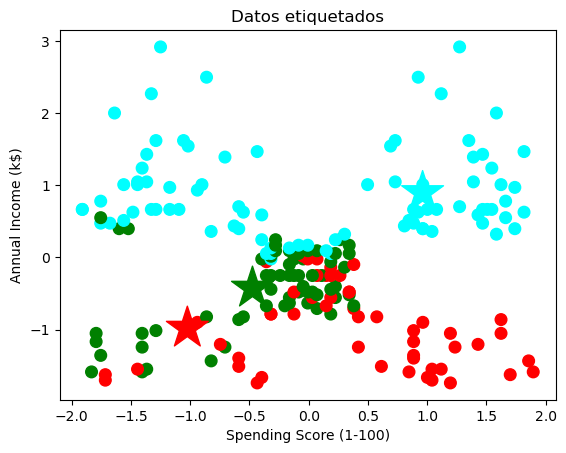

In [72]:
f1 = X['Spending Score (1-100)'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [74]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

[2]
['cyan']
Medidas de calidad para K-Means:
Puntaje de silueta: 0.33627250175154105
Índice de Calinski-Harabasz: 111.48622496693123
Inertia (suma de cuadrados dentro de los clusters): 375.26271074404747
Davies-Bouldin Index: 1.0218705983348075


<h4>Analisis</h4>
Estos son los resultados de diferentes medidas de calidad para un algoritmo de clustering K-Means aplicado a un conjunto de datos:

Puntaje de silueta: 0.33627250175154105
El puntaje de silueta mide cuán similar es un punto a su propio grupo en comparación con otros grupos. Un puntaje de silueta cercano a 1 indica que los puntos están bien clasificados, mientras que un puntaje cercano a -1 indica que un punto puede estar mal clasificado.
En este caso, un puntaje de silueta de 0.3362 sugiere que los clusters están relativamente bien definidos y los puntos están bien separados entre sí.
Índice de Calinski-Harabasz: 111.48622496693123
El índice de Calinski-Harabasz mide la relación entre la dispersión dentro de los clusters y la dispersión entre los clusters. Valores más altos indican clusters más densos y mejor separados.
Un valor de 111.4862 sugiere que los clusters tienen una buena separación entre ellos.
Inertia (suma de cuadrados dentro de los clusters): 375.26271074404747
La inercia, también conocida como suma de cuadrados dentro de los clusters, mide la cohesión dentro de los clusters. Cuanto menor sea la inercia, más compactos y densos son los clusters.
Una inercia de 375.2627 indica que los puntos dentro de los clusters están relativamente cerca unos de otros.
Davies-Bouldin Index: 1.0218705983348075
El índice Davies-Bouldin evalúa la dispersión entre los clusters en comparación con la dispersión dentro de los clusters. Valores más bajos indican una mejor partición, donde los clusters están más separados entre sí y más compactos internamente.
Un valor de 1.0218 sugiere que los clusters están bien separados y tienen una buena cohesión interna.
En general, estos resultados indican que el algoritmo K-Means ha producido clusters relativamente buenos y bien definidos para el conjunto de datos dado, con puntos que están bien agrupados dentro de los clusters y separados entre sí.

<h1>Hierarchical clustering</h1>

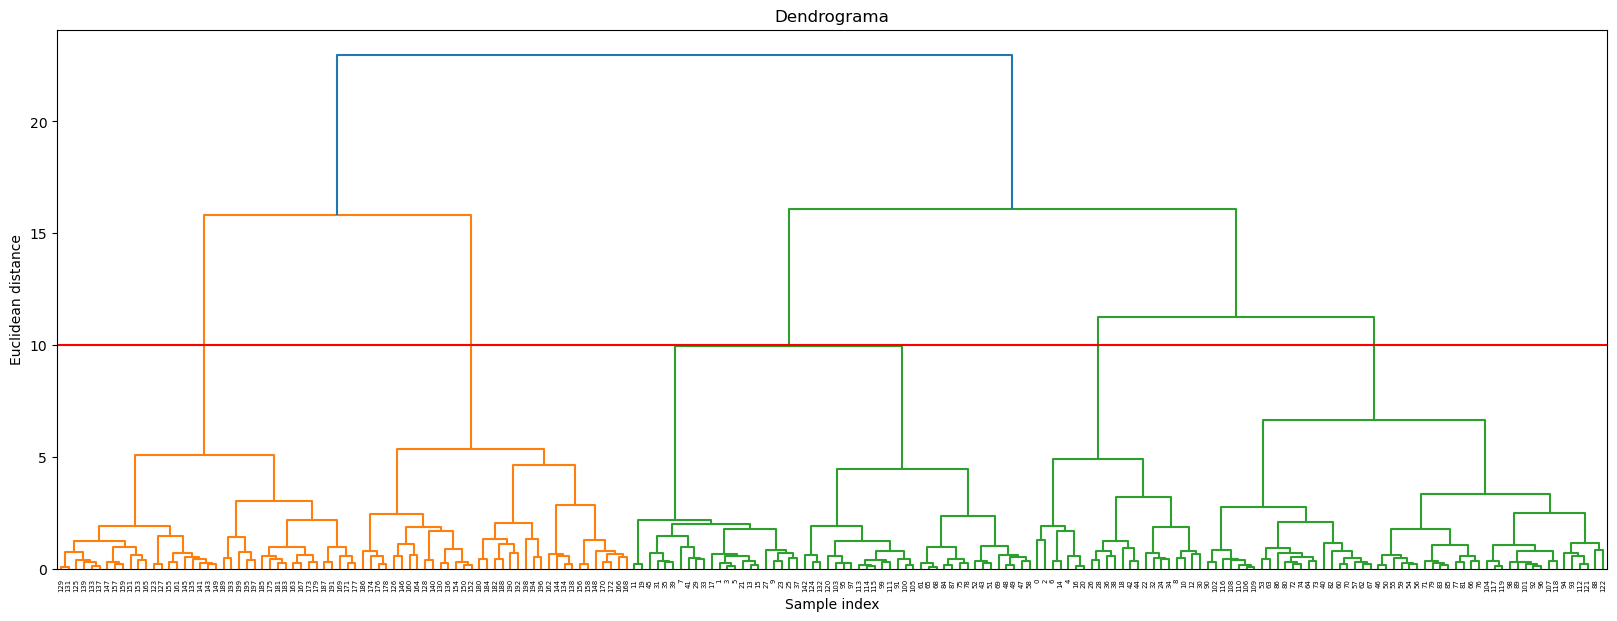

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [76]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

<h4>Grafica 5</h4>
Edad Vs Ingresos anuales 

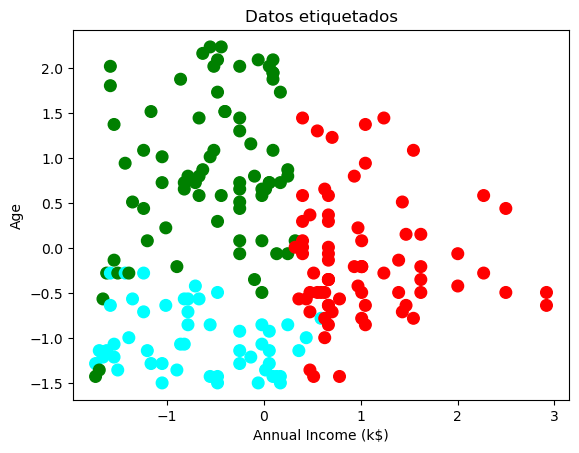

In [78]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
f1 = X['Annual Income (k$)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

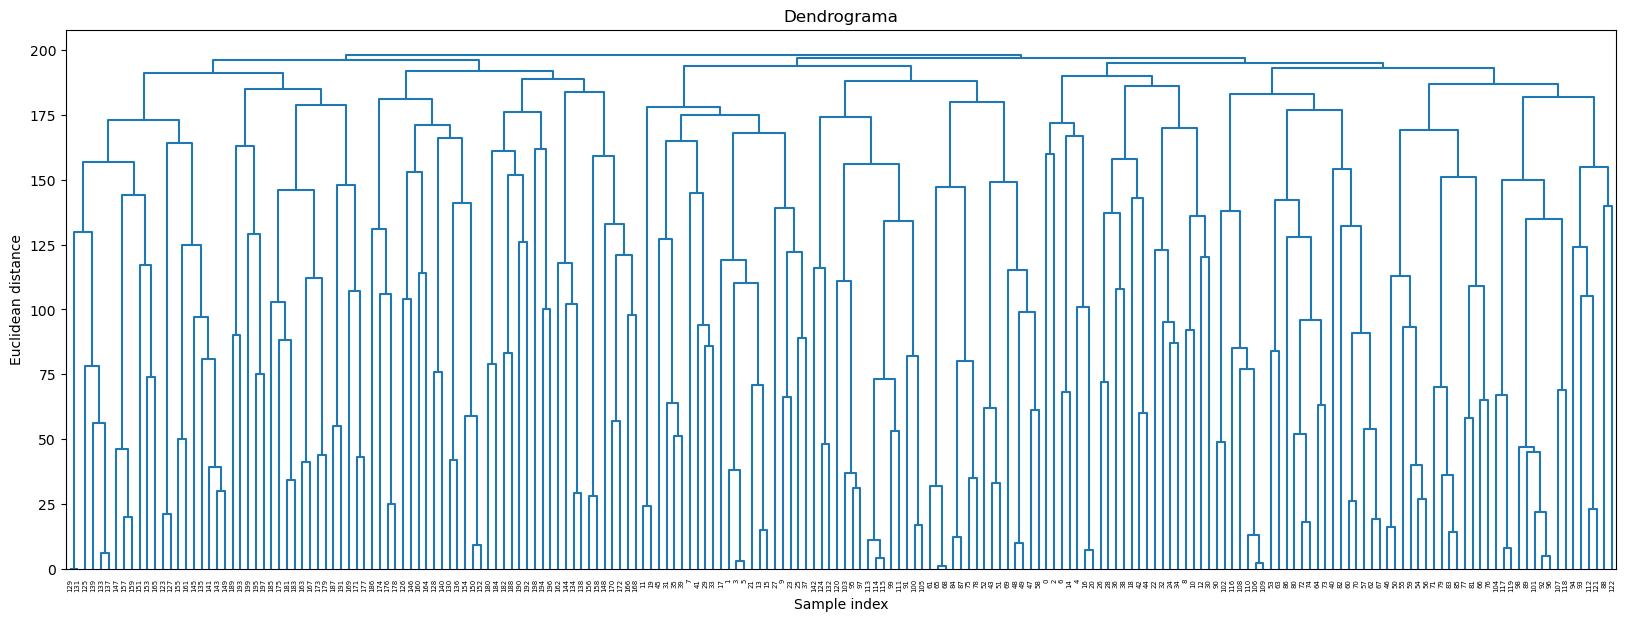

In [84]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()
    
plot_dendrogram(hier_clustering, color_threshold=0)

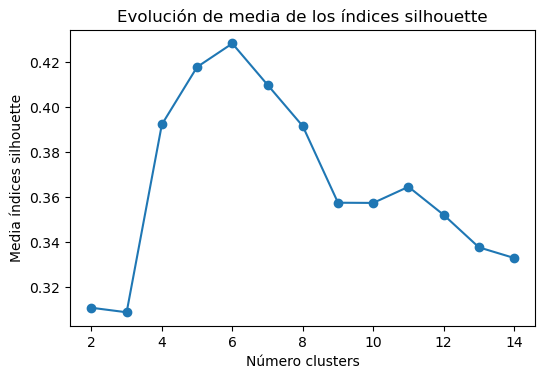

In [83]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [81]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.30874740679157575
Índice de Calinski-Harabasz: 94.85428751941517
Davies-Bouldin Index: 1.1302868682321934
Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


<h4>Analisis</h4>
El algoritmo de clustering jerárquico aplicado a los datos proporcionados ha generado clusters que están razonablemente bien definidos y separados, como se evidencia en las medidas de calidad obtenidas:

Puntaje de silueta: 0.3087 - Indica que los clusters están relativamente bien definidos y los puntos están separados entre sí.
Índice de Calinski-Harabasz: 94.8543 - Sugiere una buena separación entre los clusters.
Davies-Bouldin Index: 1.1303 - Indica que los clusters están relativamente bien separados y tienen una buena cohesión interna.
Coeficiente de correlación cofenética: 0.6449 - Muestra que el árbol jerárquico captura razonablemente bien las relaciones entre los datos.
En resumen, el algoritmo de clustering jerárquico ha producido resultados prometedores, aunque aún podría haber áreas de mejora en la cohesión interna de los clusters y la precisión del ajuste del árbol jerárquico a los datos.